# Part I - (Movie data set)

## by (Anastacia Nyamoita)

## Introduction

### About this dataset and points of interest

> This dataset is a combination of 4 datasets to create whole new dataset that contains production budget, world wide gross, vote count, popularity ,genre itself,run time and most importantly, profit.

>These variables are my point of analysis.
Analysis questions like;

             >ANALYSIS 1.Checking the most produced genres
             
             >ANALYSIS 2:checking if the most produced genres are the most profitable genres
             
             >ANALYSIS 3:checking if more production bugdet translates to higher profit
             
             >ANALYSIS 4: checking for most expensive genres to produce
             
             >ANALYSIS 5:Checking if the runtime can affect the profit
             
             >ANALYSIS 6: Checking whether movie rating affect profit
             
             >ANALYSIS 7:Checking if time of the year movie is produced affects profit|


## Importing libraries and loading the datasets

In [1]:
!pip install seaborn==0.9.0

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
#calling the funcyion
gross_df=pd.read_csv("Data/bom.movie_gross.csv.gz")
budget_df=pd.read_csv('Data/tn.movie_budgets.csv.gz')

In [4]:
#decided to add other datasets just for my practice
reviews_df=pd.read_csv('Data/rt.movie_info.tsv.gz',sep='\t')
movie_df=pd.read_csv('Data/tmdb.movies.csv.gz',index_col='Unnamed: 0')

In [5]:
movie_df.head()

genre_ids     id original_language  \
0      [12, 14, 10751]  12444                en   
1  [14, 12, 16, 10751]  10191                en   
2        [12, 28, 878]  10138                en   
3      [16, 35, 10751]    862                en   
4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  
2                                    Iron Man 2           6.8       12368  
3                                     Toy Story           7.9       10174  
4                                     Inception           8.3       22186

In [6]:
gross_df.head()

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010

In [7]:
budget_df.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

In [8]:
reviews_df.sample(5)

id                                           synopsis rating  \
1169  1503  You've probably already guessed that the Famil...      R   
720    925  Adapted from the book by David Foster Wallace,...     NR   
1406  1814  This coming-of-age comedy is set in a sleepy l...     NR   
213    280                                                NaN     NR   
458    601  Superman (Christopher Reeve) tries to save the...     PG   

                                                 genre         director  \
1169                 Action and Adventure|Comedy|Drama     Sidney Lumet   
720                                       Comedy|Drama   John Krasinski   
1406  Art House and International|Comedy|Drama|Romance  Lukas Moodysson   
213                        Art House and International       Lo Po-Shan   
458   Action and Adventure|Science Fiction and Fantasy              NaN   

                                writer  theater_date      dvd_date currency  \
1169  Vincent Patrick|Richard Burridge  Dec 15, 1989  May 20, 2003      NaN   
720                     John Krasinski  Sep 25, 2009  Mar 16, 2010      NaN   
1406                   Lukas Moodysson  Oct 15, 1999   Oct 3, 2000      NaN   
213                                NaN           NaN           NaN      NaN   
458     Lawrence Konner|Mark Rosenthal  Jul 24, 1987   May 1, 2001      NaN   

     box_office      runtime studio  
1169        NaN  114 minutes    NaN  
720         NaN   80 minutes    IFC  
1406        NaN   89 minutes    NaN  
213         NaN   89 minutes    NaN  
458         NaN   91 minutes    NaN

## checking the components of the datasets

In [9]:
#checking the number of columns,the data types and null values
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [10]:
#checking the number of rows and columns just to know what we are working with
movie_df.shape

(26517, 9)

In [11]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
gross_df.shape

(3387, 5)

In [13]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB


In [14]:
budget_df.shape

(5782, 6)

In [15]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.3+ KB


In [16]:
reviews_df.shape

(1560, 12)

## MAIN FEATURES IN THIS DATASET.

My main points of interest are to see the most produced genres, how much they earn, by that, I mean the profit in relation 
to genre.

>The production budget, how does it relate to genre and also profit?

>Run time and rating, how does it affect the production budget and the profit?

>Lastly, which time of the year are movies making the most profit?

>Let's find out...

# Data preparation and cleaning

## Joining data frames first before starting data cleaning

In [17]:
#joining movie_df and gross_df
movie_gross_df=pd.merge(movie_df,gross_df)

In [18]:
#looking at the columns and the data types of this new data frame
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2703 entries, 0 to 2702
Data columns (total 13 columns):
genre_ids            2703 non-null object
id                   2703 non-null int64
original_language    2703 non-null object
original_title       2703 non-null object
popularity           2703 non-null float64
release_date         2703 non-null object
title                2703 non-null object
vote_average         2703 non-null float64
vote_count           2703 non-null int64
studio               2702 non-null object
domestic_gross       2682 non-null float64
foreign_gross        1723 non-null object
year                 2703 non-null int64
dtypes: float64(3), int64(3), object(7)
memory usage: 295.6+ KB


In [19]:
#now renaming the movie column in budget df so its easier to merge and the reason i am merging is cause 
#it will be easier to analyse
budget_df.rename(columns={'movie':'title'},inplace=True)

In [20]:
budget_df['domestic_gross']=budget_df['domestic_gross'].str.replace('$','',regex=True)
budget_df['domestic_gross']=budget_df['domestic_gross'].str.replace(',','',regex=True)
budget_df.head()

id  release_date                                        title  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000      760507625  $2,776,345,279  
1      $410,600,000      241063875  $1,045,663,875  
2      $350,000,000       42762350    $149,762,350  
3      $330,600,000      459005868  $1,403,013,963  
4      $317,000,000      620181382  $1,316,721,747

In [21]:
#changing the data type of the domestic column to be able to join columns with same data type
budget_df['domestic_gross']=budget_df['domestic_gross'].astype(float)

In [22]:
movie_gross_df.rename(columns={'foreign_gross':'worldwide_gross'},inplace=True)

In [23]:
#now merging the two data frames 
movie_info_df=pd.merge(movie_gross_df,budget_df,on=['title'])

In [24]:
movie_info_df.head()

genre_ids   id_x original_language            original_title  \
0  [14, 12, 16, 10751]  10191                en  How to Train Your Dragon   
1        [12, 28, 878]  10138                en                Iron Man 2   
2        [28, 878, 12]  27205                en                 Inception   
3      [16, 10751, 35]  10193                en               Toy Story 3   
4      [16, 10751, 35]  20352                en             Despicable Me   

   popularity release_date_x                     title  vote_average  \
0      28.734     2010-03-26  How to Train Your Dragon           7.7   
1      28.515     2010-05-07                Iron Man 2           6.8   
2      27.920     2010-07-16                 Inception           8.3   
3      24.445     2010-06-17               Toy Story 3           7.7   
4      23.673     2010-07-09             Despicable Me           7.2   

   vote_count studio  domestic_gross_x worldwide_gross_x  year  id_y  \
0        7610   P/DW       217600000.0         277300000  2010    30   
1       12368   Par.       312400000.0         311500000  2010    15   
2       22186     WB       292600000.0         535700000  2010    38   
3        8340     BV       415000000.0         652000000  2010    47   
4       10057   Uni.       251500000.0         291600000  2010    50   

  release_date_y production_budget  domestic_gross_y worldwide_gross_y  
0   Mar 26, 2010      $165,000,000       217581232.0      $494,870,992  
1    May 7, 2010      $170,000,000       312433331.0      $621,156,389  
2   Jul 16, 2010      $160,000,000       292576195.0      $835,524,642  
3   Jun 18, 2010      $200,000,000       415004880.0    $1,068,879,522  
4    Jul 9, 2010       $69,000,000       251513985.0      $543,464,573

In [25]:
#decided to drop the columns i dont need although its not necessary
movie_info_df.drop('release_date_x',axis=1,inplace=True)

In [26]:
#removing the dollar sign and removing the comma in the values to be able to work with them
movie_info_df['production_budget']=movie_info_df['production_budget'].str.replace('$','',regex=True)
movie_info_df['production_budget']=movie_info_df['production_budget'].str.replace(',','',regex=True)
movie_info_df.head(3)

genre_ids   id_x original_language            original_title  \
0  [14, 12, 16, 10751]  10191                en  How to Train Your Dragon   
1        [12, 28, 878]  10138                en                Iron Man 2   
2        [28, 878, 12]  27205                en                 Inception   

   popularity                     title  vote_average  vote_count studio  \
0      28.734  How to Train Your Dragon           7.7        7610   P/DW   
1      28.515                Iron Man 2           6.8       12368   Par.   
2      27.920                 Inception           8.3       22186     WB   

   domestic_gross_x worldwide_gross_x  year  id_y release_date_y  \
0       217600000.0         277300000  2010    30   Mar 26, 2010   
1       312400000.0         311500000  2010    15    May 7, 2010   
2       292600000.0         535700000  2010    38   Jul 16, 2010   

  production_budget  domestic_gross_y worldwide_gross_y  
0         165000000       217581232.0      $494,870,992  
1         170000000       312433331.0      $621,156,389  
2         160000000       292576195.0      $835,524,642

In [27]:
#looking at the domestic gross column,the values are almost the same so i will drop one of the domestic_gross columns
movie_info_df.drop('domestic_gross_x',axis=1,inplace=True)

In [28]:
#dropping this column because the null values are many
movie_info_df.drop('worldwide_gross_x',axis=1,inplace=True)

In [29]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 15 columns):
genre_ids            1395 non-null object
id_x                 1395 non-null int64
original_language    1395 non-null object
original_title       1395 non-null object
popularity           1395 non-null float64
title                1395 non-null object
vote_average         1395 non-null float64
vote_count           1395 non-null int64
studio               1394 non-null object
year                 1395 non-null int64
id_y                 1395 non-null int64
release_date_y       1395 non-null object
production_budget    1395 non-null object
domestic_gross_y     1395 non-null float64
worldwide_gross_y    1395 non-null object
dtypes: float64(3), int64(4), object(8)
memory usage: 174.4+ KB


In [30]:
#checking the number of null values in each column
movie_info_df.isna().sum()

genre_ids            0
id_x                 0
original_language    0
original_title       0
popularity           0
title                0
vote_average         0
vote_count           0
studio               1
year                 0
id_y                 0
release_date_y       0
production_budget    0
domestic_gross_y     0
worldwide_gross_y    0
dtype: int64

In [31]:
#removing the comma in this column
movie_info_df['worldwide_gross_y']=movie_info_df['worldwide_gross_y'].str.replace('$','',regex=True)
movie_info_df['worldwide_gross_y']=movie_info_df['worldwide_gross_y'].str.replace(',','',regex=True)
movie_info_df.head(3)


genre_ids   id_x original_language            original_title  \
0  [14, 12, 16, 10751]  10191                en  How to Train Your Dragon   
1        [12, 28, 878]  10138                en                Iron Man 2   
2        [28, 878, 12]  27205                en                 Inception   

   popularity                     title  vote_average  vote_count studio  \
0      28.734  How to Train Your Dragon           7.7        7610   P/DW   
1      28.515                Iron Man 2           6.8       12368   Par.   
2      27.920                 Inception           8.3       22186     WB   

   year  id_y release_date_y production_budget  domestic_gross_y  \
0  2010    30   Mar 26, 2010         165000000       217581232.0   
1  2010    15    May 7, 2010         170000000       312433331.0   
2  2010    38   Jul 16, 2010         160000000       292576195.0   

  worldwide_gross_y  
0         494870992  
1         621156389  
2         835524642

In [32]:
#sorting values by production budget from largest
movie_info_df.sort_values(by='production_budget',ascending=False,inplace=True)

In [33]:
#checking for duplicates
movie_info_df.duplicated().value_counts()

False    1271
True      124
dtype: int64

In [34]:
movie_info_df.drop_duplicates(inplace=True)

In [35]:
movie_info_df.duplicated().value_counts()

False    1271
dtype: int64

In [36]:
#checking how many times each studio has produced a movie
movie_info_df['studio'].value_counts().head()

Uni.    136
Fox     113
WB      105
Par.     76
BV       76
Name: studio, dtype: int64

In [37]:
movie_info_df.columns

Index(['genre_ids', 'id_x', 'original_language', 'original_title',
       'popularity', 'title', 'vote_average', 'vote_count', 'studio', 'year',
       'id_y', 'release_date_y', 'production_budget', 'domestic_gross_y',
       'worldwide_gross_y'],
      dtype='object')

## joining the reviews df with movie_info_df to expand the data abit

In [38]:
movies_info_df=pd.merge(movie_info_df,reviews_df,on='studio')

In [39]:
movies_info_df.head(3)

genre_ids    id_x original_language     original_title  \
0  [12, 35, 16, 10751]  227973                en  The Peanuts Movie   
1        [27, 878, 53]  126889                en    Alien: Covenant   
2                 [99]  217664                en        Unstoppable   

   popularity              title  vote_average  vote_count studio  year  \
0      11.344  The Peanuts Movie           6.6         894    Fox  2015   
1      24.651    Alien: Covenant           5.9        4971    Fox  2017   
2       0.600        Unstoppable           1.6           4    Fox  2010   

      ...                                                synopsis rating  \
0     ...       Aging, small town attorney Mac McClain (Matthe...  PG-13   
1     ...       Aging, small town attorney Mac McClain (Matthe...  PG-13   
2     ...       Aging, small town attorney Mac McClain (Matthe...  PG-13   

                        genre      director  \
0  Drama|Mystery and Suspense  Gary Wheeler   
1  Drama|Mystery and Suspense  Gary Wheeler   
2  Drama|Mystery and Suspense  Gary Wheeler   

                                              writer  theater_date dvd_date  \
0  Mark Freiburger|Gary Wheeler|Robert Whitlow|Ma...           NaN      NaN   
1  Mark Freiburger|Gary Wheeler|Robert Whitlow|Ma...           NaN      NaN   
2  Mark Freiburger|Gary Wheeler|Robert Whitlow|Ma...           NaN      NaN   

  currency box_office      runtime  
0      NaN        NaN  101 minutes  
1      NaN        NaN  101 minutes  
2      NaN        NaN  101 minutes  

[3 rows x 26 columns]

In [40]:
movies_info_df.columns

Index(['genre_ids', 'id_x', 'original_language', 'original_title',
       'popularity', 'title', 'vote_average', 'vote_count', 'studio', 'year',
       'id_y', 'release_date_y', 'production_budget', 'domestic_gross_y',
       'worldwide_gross_y', 'id', 'synopsis', 'rating', 'genre', 'director',
       'writer', 'theater_date', 'dvd_date', 'currency', 'box_office',
       'runtime'],
      dtype='object')

## cleaning the newly joined data frame

In [41]:
movies_info_df.isna().sum()

genre_ids               0
id_x                    0
original_language       0
original_title          0
popularity              0
title                   0
vote_average            0
vote_count              0
studio               1066
year                    0
id_y                    0
release_date_y          0
production_budget       0
domestic_gross_y        0
worldwide_gross_y       0
id                      0
synopsis               61
rating                  3
genre                   8
director              145
writer                349
theater_date          442
dvd_date              442
currency             1177
box_office           1177
runtime                25
dtype: int64

In [42]:
movies_info_df['genre'].dropna(inplace=True)
movies_info_df['runtime'].dropna(inplace=True)

In [43]:
#dropping unnecessary columns

movies_info_df.drop(columns='id_x',inplace=True)
movies_info_df.drop(columns='original_language',inplace=True)

In [44]:
movies_info_df.drop(['theater_date','dvd_date','currency','box_office','genre_ids','id_y'],axis= 1, inplace=True)
movies_info_df.set_index('genre').head(3)

original_title  popularity              title  \
genre                                                                          
Drama|Mystery and Suspense  The Peanuts Movie      11.344  The Peanuts Movie   
Drama|Mystery and Suspense    Alien: Covenant      24.651    Alien: Covenant   
Drama|Mystery and Suspense        Unstoppable       0.600        Unstoppable   

                            vote_average  vote_count studio  year  \
genre                                                               
Drama|Mystery and Suspense           6.6         894    Fox  2015   
Drama|Mystery and Suspense           5.9        4971    Fox  2017   
Drama|Mystery and Suspense           1.6           4    Fox  2010   

                           release_date_y production_budget  domestic_gross_y  \
genre                                                                           
Drama|Mystery and Suspense    Nov 6, 2015          99000000       130178411.0   
Drama|Mystery and Suspense   May 19, 2017          97000000        74262031.0   
Drama|Mystery and Suspense   Nov 12, 2010          95000000        81562942.0   

                           worldwide_gross_y   id  \
genre                                               
Drama|Mystery and Suspense         250091610  102   
Drama|Mystery and Suspense         238521247  102   
Drama|Mystery and Suspense         165720921  102   

                                                                     synopsis  \
genre                                                                           
Drama|Mystery and Suspense  Aging, small town attorney Mac McClain (Matthe...   
Drama|Mystery and Suspense  Aging, small town attorney Mac McClain (Matthe...   
Drama|Mystery and Suspense  Aging, small town attorney Mac McClain (Matthe...   

                           rating      director  \
genre                                             
Drama|Mystery and Suspense  PG-13  Gary Wheeler   
Drama|Mystery and Suspense  PG-13  Gary Wheeler   
Drama|Mystery and Suspense  PG-13  Gary Wheeler   

                                                                       writer  \
genre                                                                           
Drama|Mystery and Suspense  Mark Freiburger|Gary Wheeler|Robert Whitlow|Ma...   
Drama|Mystery and Suspense  Mark Freiburger|Gary Wheeler|Robert Whitlow|Ma...   
Drama|Mystery and Suspense  Mark Freiburger|Gary Wheeler|Robert Whitlow|Ma...   

                                runtime  
genre                                    
Drama|Mystery and Suspense  101 minutes  
Drama|Mystery and Suspense  101 minutes  
Drama|Mystery and Suspense  101 minutes

In [45]:
movies_info_df.shape

(1348, 18)

In [46]:
movie_info_df['worldwide_gross_y'].head()

17      84747441
950    250091610
21      84747441
19      84747441
703     11310835
Name: worldwide_gross_y, dtype: object

In [47]:
movies_info_df['production_budget']=movies_info_df['production_budget'].astype(float)
movies_info_df['worldwide_gross_y']=movies_info_df['worldwide_gross_y'].astype(float)

In [48]:
#looking if the columns are okay
movies_info_df['production_budget'].isna().sum()

0

In [49]:
#checking if there are columns with zero values in the numeric columns
zeros1=(movies_info_df['worldwide_gross_y']==0).sum()
zeros1

0

In [50]:
zeros2=(movies_info_df['worldwide_gross_y']==0).sum()
zeros2

0

In [51]:
#dropping the missing values in the studio column
movies_info_df['runtime']=movies_info_df['runtime'].dropna(axis=0,how='any')

In [52]:
movies_info_df['runtime'].head(2)

0    101 minutes
1    101 minutes
Name: runtime, dtype: object

In [53]:
movies_info_df['runtime']=movies_info_df['runtime'].str.replace('minutes','',regex=True)
movies_info_df['runtime']=movies_info_df['runtime'].astype(float)

In [54]:
movies_info_df['runtime'].head(4)

0    101.0
1    101.0
2    101.0
3    101.0
Name: runtime, dtype: float64

# UNIVARIATE ANALYSIS : a type of data which consists of observations on only a single characteristic or attribute.

## Exploratory analysis and visualization

In univariate analysis, we will look at the genre.
  >What kind of distribution it has, its frequency (count) and the ind of skeweness

 >We will use the value counts method to look at the most produced genre, and eventually ake plots from it, and eventually make conclusions

## ANALYSIS 1.Checking the most produced genres

In [55]:
movies_info_df[["popularity","runtime","vote_count","production_budget","worldwide_gross_y"]].describe()

popularity      runtime    vote_count  production_budget  \
count  1348.000000  1323.000000   1348.000000       1.348000e+03   
mean      7.086981   104.781557    646.435460       1.932116e+07   
std       5.437375    24.875330   1840.362586       3.396473e+07   
min       0.600000     5.000000      1.000000       5.000000e+04   
25%       5.121000    91.000000     96.000000       8.000000e+06   
50%       5.121000   101.000000     96.000000       8.000000e+06   
75%       5.121000   116.000000     96.000000       8.000000e+06   
max      48.571000   313.000000  22186.000000       3.000000e+08   

       worldwide_gross_y  
count       1.348000e+03  
mean        4.245439e+07  
std         1.259987e+08  
min         1.980000e+04  
25%         3.587191e+06  
50%         3.587191e+06  
75%         3.587191e+06  
max         1.146895e+09

In [56]:
movies_info_df.columns

Index(['original_title', 'popularity', 'title', 'vote_average', 'vote_count',
       'studio', 'year', 'release_date_y', 'production_budget',
       'domestic_gross_y', 'worldwide_gross_y', 'id', 'synopsis', 'rating',
       'genre', 'director', 'writer', 'runtime'],
      dtype='object')

By using the describe function on the selected columns, we get the mean, std, min, max, 25th percentile, 50th percentile, and 75% percentile values of the columns.
We can see that the minimum vote count among the movies is 1.000. Also, the minimum value of the YearsEmployed column is 0. This tells that people without any employment history also applied for a credit card. A similar type of observation can be seen for other continuous columns.

In [57]:
movies_info_df['genre'].nunique()

254

In [58]:
top_15_genres = movies_info_df["genre"].value_counts().head(15)
top_15_genres

Drama|Mystery and Suspense                         267
Drama                                               86
Comedy|Drama                                        73
Comedy                                              57
Art House and International|Drama                   53
Action and Adventure|Drama                          29
Action and Adventure|Drama|Mystery and Suspense     28
Drama|Romance                                       26
Art House and International|Comedy|Drama            25
Horror                                              23
Drama|Horror                                        22
Classics|Drama                                      19
Classics|Drama|Mystery and Suspense                 18
Comedy|Romance                                      18
Action and Adventure                                18
Name: genre, dtype: int64

In [59]:
def axislabels(x, y, t):
    """ 
    Args:
    x(str) :x_axis label
    y(str) :y_axis label
    t(str) :main title
    
    Returns:
    None
    """
    plt.xlabel(x,fontsize=12)
    plt.ylabel(x,fontsize=12)
    plt.title(t,fontsize=14)
    plt.show()
    

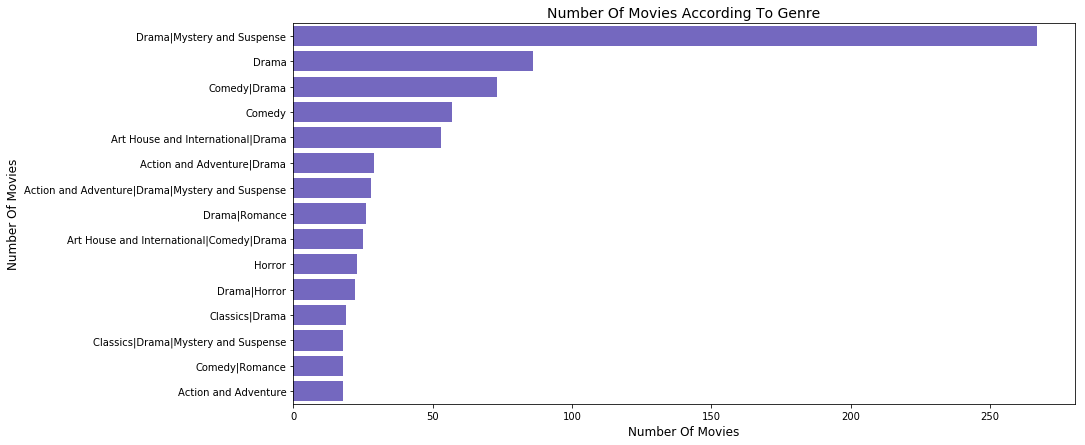

In [60]:
plt.figure(figsize=(14,7))
ax=sns.barplot(y=top_15_genres.index, x= top_15_genres,color='slateblue')
axislabels('Number Of Movies','Genre','Number Of Movies According To Genre')

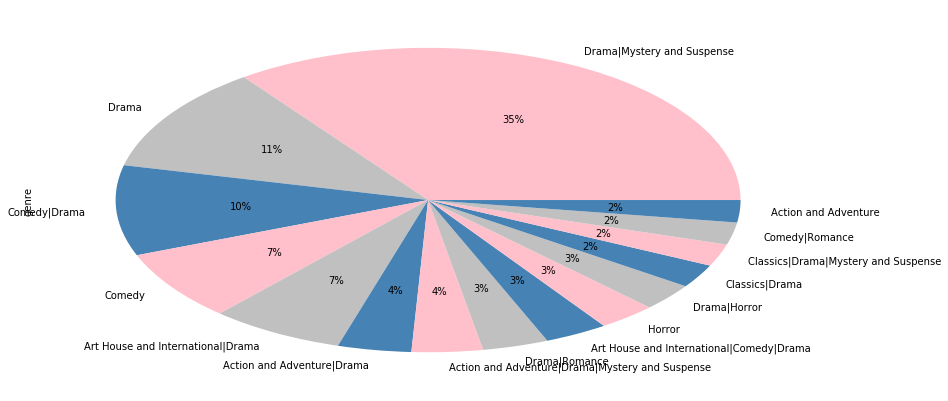

In [61]:
  # Defining colors for the pie chart
plt.figure(figsize=(14,7))
colors = ['pink', 'silver', 'steelblue']
  
# Plotting the pie chart for above dataframe
top_15_genres.plot(
    kind='pie',
  autopct='%1.0f%%', colors=colors);

Drama related movies,mystery and suspense,comedy and Art house and international movies are the produced genres. but are they the most profitable genres?.Let us see..

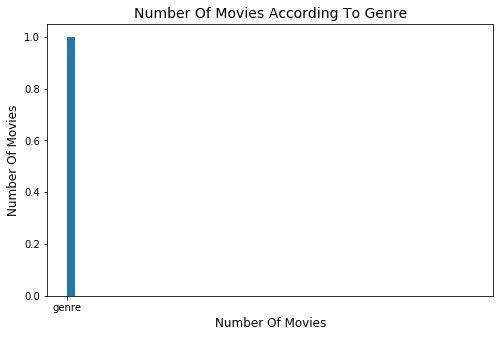

In [62]:
import numpy as np
binsize = 5
bins = np.arange(0, top_15_genres.max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = top_15_genres, x = 'genre', bins = bins)
axislabels('Number Of Movies','Genre','Number Of Movies According To Genre')

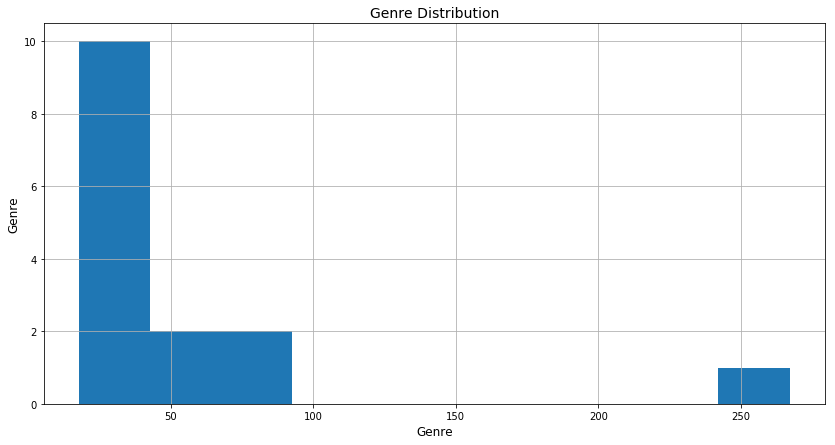

In [63]:
plt.figure(figsize=(14,7))
top_15_genres.hist(bins=10)
axislabels('Genre',"Frequency (count)","Genre Distribution")

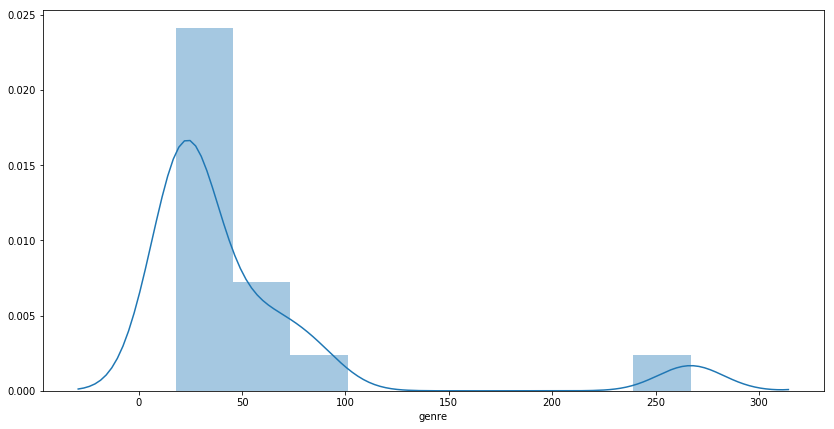

In [64]:
plt.figure(figsize=(14,7))
sns.distplot(top_15_genres);

### conclusion.

we have a very skewed data, coz of the ouliers.

Drama related movies,mystery and suspense,comedy and Art house and international movies are the produced genres. but are they the most profitable genres?.Let us see..

# BIVARIATE ANALYSIS:  analysis of two variables to determine relationships between them.

## Points of interest in bivariate analysis
Exploration between ;

 >Genre and profit
 
 >Genres and profit
 
 >Does more production budget translate to more profit
 
 >Relationship between profit and rating
 
 >Which month in the year give more profit
 
 >Does longer movies(runtime) translate to more profit or vise versa?
 
 >LET'S SEEE....

## ANALYSIS 2:checking if the most produced genres are the most profitable genres

In [65]:
#addding the profits column
movies_info_df['profit']=(
                       movies_info_df['worldwide_gross_y']
                       +movies_info_df['domestic_gross_y'])-movies_info_df['production_budget']

In [66]:
#grouping by genre to solve this
profit_df=movies_info_df.groupby('genre',as_index=False)[
                   ['production_budget','worldwide_gross_y','profit']].mean().sort_values(by='production_budget',ascending=False)

In [67]:
profit_df.head(10)

genre  production_budget  \
227                         Drama|Mystery and Suspense       6.315431e+07   
105  Art House and International|Comedy|Drama|Music...       3.133333e+07   
220                  Drama|Horror|Mystery and Suspense       1.577778e+07   
74           Action and Adventure|Mystery and Suspense       1.436364e+07   
231                                      Drama|Romance       1.069231e+07   
53                          Action and Adventure|Drama       1.041379e+07   
182                                       Comedy|Drama       9.912603e+06   
217                                              Drama       8.813953e+06   
166                                    Classics|Horror       8.000000e+06   
168               Classics|Horror|Mystery and Suspense       8.000000e+06   

     worldwide_gross_y        profit  
227       1.897898e+08  1.991134e+08  
105       9.438215e+07  1.183897e+08  
220       3.385218e+07  3.654595e+07  
74        2.834945e+07  2.910561e+07  
231       1.406353e+07  9.789339e+06  
53        1.297977e+07  8.323967e+06  
182       1.342146e+07  8.075204e+06  
217       6.754457e+06 -9.340326e+04  
166       3.587191e+06 -4.375925e+06  
168       3.587191e+06 -4.375925e+06

In [68]:
top_15_profit_df=profit_df.head(15)

In [69]:
top_15_profit_df=top_15_profit_df.sort_values(by='profit',ascending=False)
top_15_profit_df

genre  production_budget  \
227                         Drama|Mystery and Suspense       6.315431e+07   
105  Art House and International|Comedy|Drama|Music...       3.133333e+07   
220                  Drama|Horror|Mystery and Suspense       1.577778e+07   
74           Action and Adventure|Mystery and Suspense       1.436364e+07   
231                                      Drama|Romance       1.069231e+07   
53                          Action and Adventure|Drama       1.041379e+07   
182                                       Comedy|Drama       9.912603e+06   
217                                              Drama       8.813953e+06   
166                                    Classics|Horror       8.000000e+06   
168               Classics|Horror|Mystery and Suspense       8.000000e+06   
167  Classics|Horror|Musical and Performing Arts|Sc...       8.000000e+06   
164         Classics|Drama|Science Fiction and Fantasy       8.000000e+06   
165                             Classics|Drama|Western       8.000000e+06   
170        Classics|Horror|Science Fiction and Fantasy       8.000000e+06   
163                             Classics|Drama|Romance       8.000000e+06   

     worldwide_gross_y        profit  
227       1.897898e+08  1.991134e+08  
105       9.438215e+07  1.183897e+08  
220       3.385218e+07  3.654595e+07  
74        2.834945e+07  2.910561e+07  
231       1.406353e+07  9.789339e+06  
53        1.297977e+07  8.323967e+06  
182       1.342146e+07  8.075204e+06  
217       6.754457e+06 -9.340326e+04  
166       3.587191e+06 -4.375925e+06  
168       3.587191e+06 -4.375925e+06  
167       3.587191e+06 -4.375925e+06  
164       3.587191e+06 -4.375925e+06  
165       3.587191e+06 -4.375925e+06  
170       3.587191e+06 -4.375925e+06  
163       3.587191e+06 -4.375925e+06

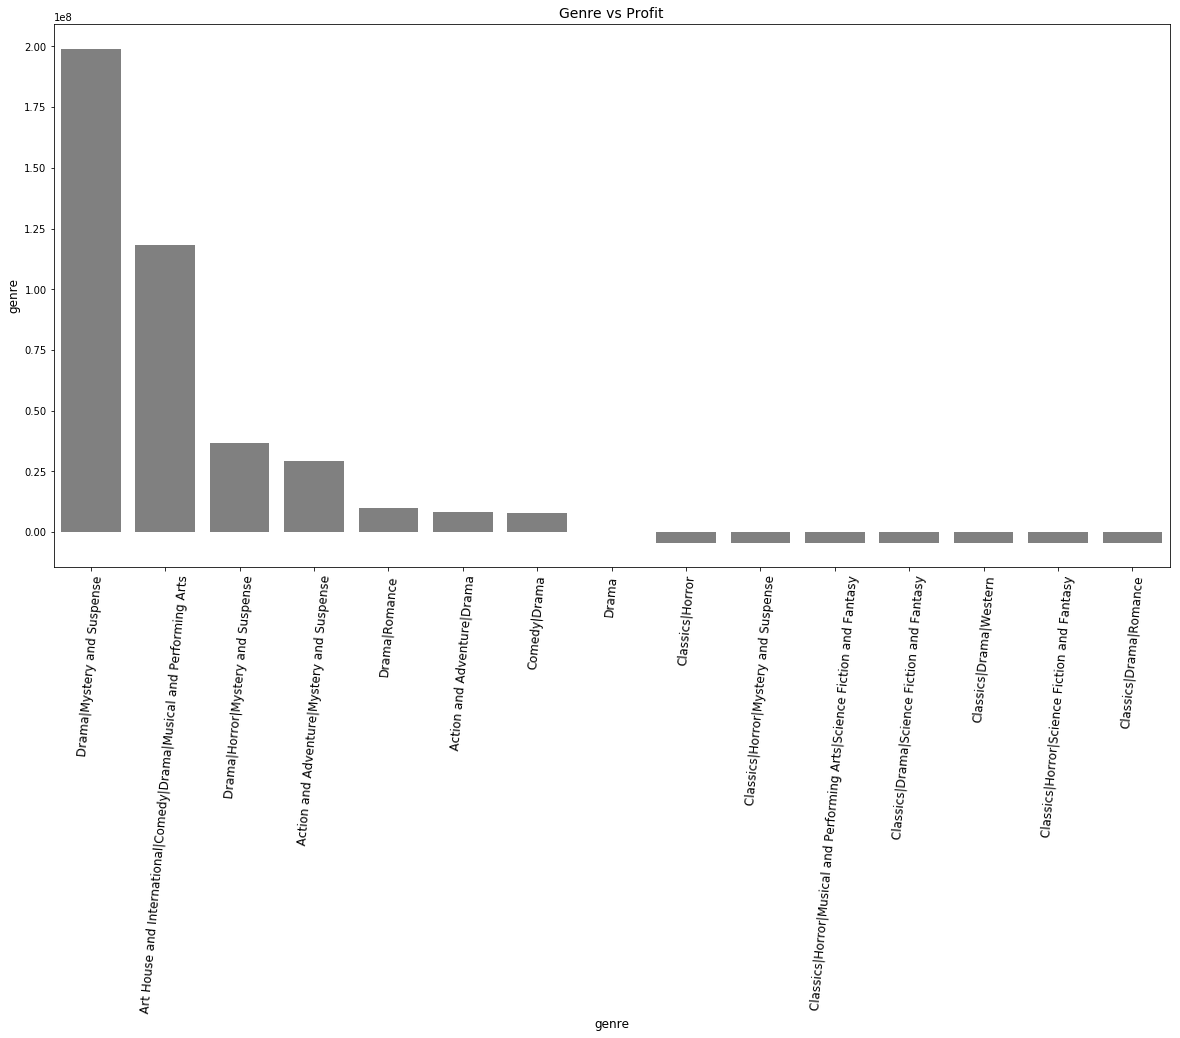

In [70]:
#between genre and profit
plt.figure(figsize=(20,10))
ax=sns.barplot(x=top_15_profit_df['genre'], y=top_15_profit_df['profit'], color="Grey")
plt.xticks(rotation=85,fontsize=12);
axislabels('genre','Profit','Genre vs Profit')

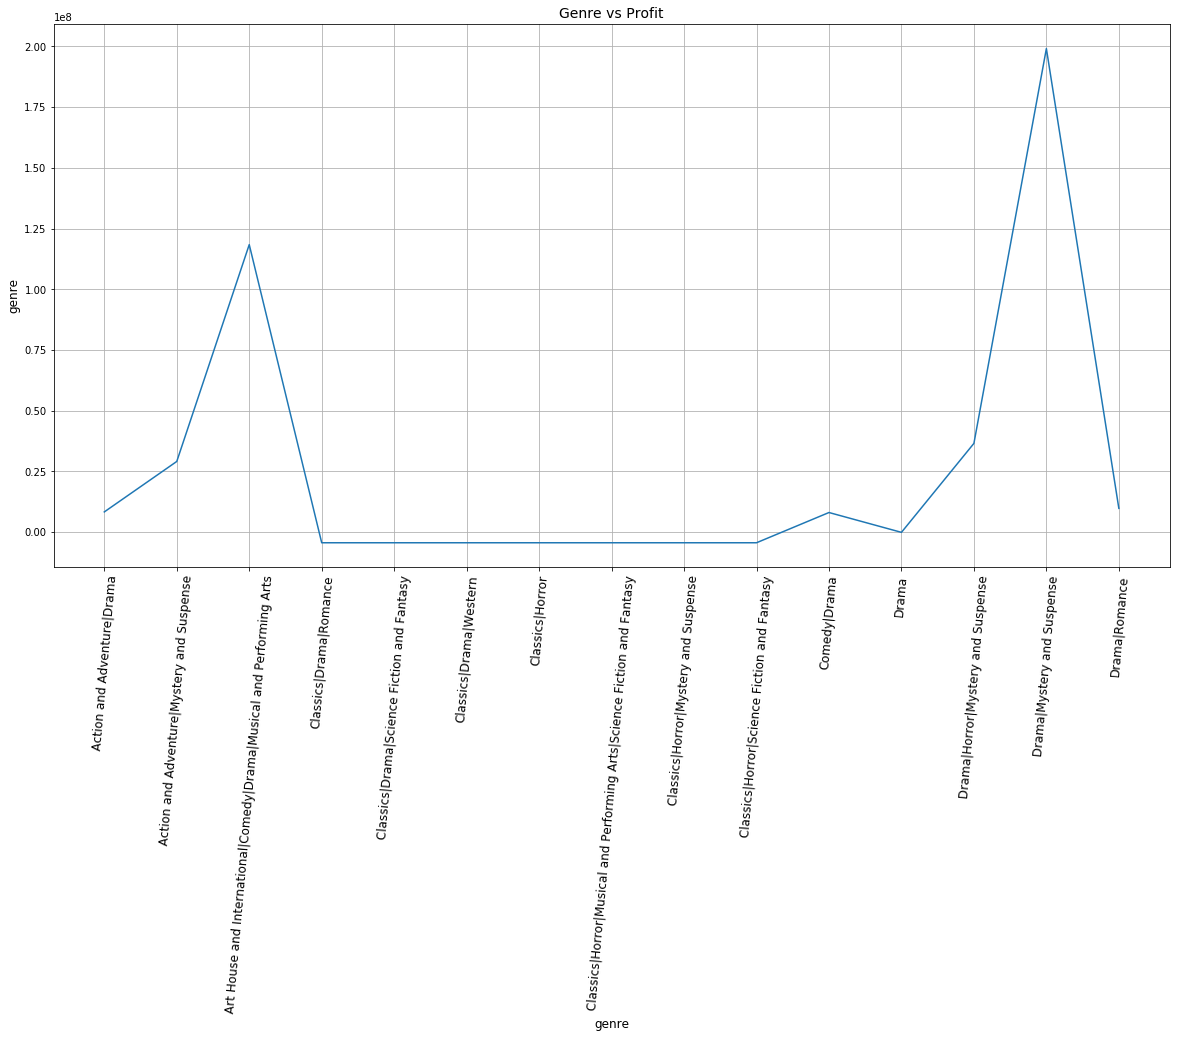

In [71]:
#a line graph of genre vs profit
plt.figure(figsize=(20,10))
ax=sns.lineplot(x=top_15_profit_df['genre'], y=top_15_profit_df['profit'])
plt.xticks(rotation=85,fontsize=12)
plt.grid()
axislabels('genre','Profit','Genre vs Profit')

### CONCLUSION
Drama is indeed the most profitable genre,or drama related movies are very profitable in terms of the mean profit. Action and comedy follow closely too. I recommend Microsoft to look into producing drama related movies with comedy,Action,mystery and suspense because apart from being the most produced genres,they are also very profitable.

## ANALYSIS 3:checking if more production bugdet translates to higher profit

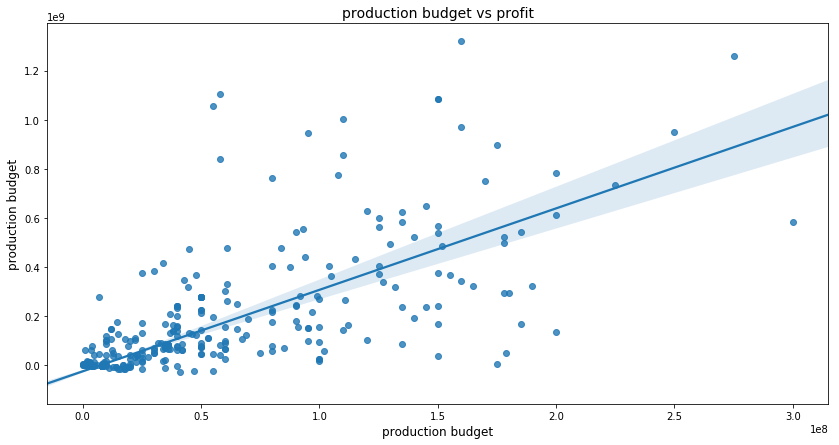

In [72]:
#does spending on the budget relate to higher profits?
plt.figure(figsize=(14,7))
ax=sns.regplot(y=movies_info_df['profit'], x=movies_info_df['production_budget'])
axislabels('production budget','Profit','production budget vs profit')

### CONCLUSION
This shows that an increase in production budget leads to a corresponding increase in profit,the two variables have a strong relationship. So Microsoft should keep this in mind while producing.

## ANALYSIS 4: checking for most expensive genres to produce

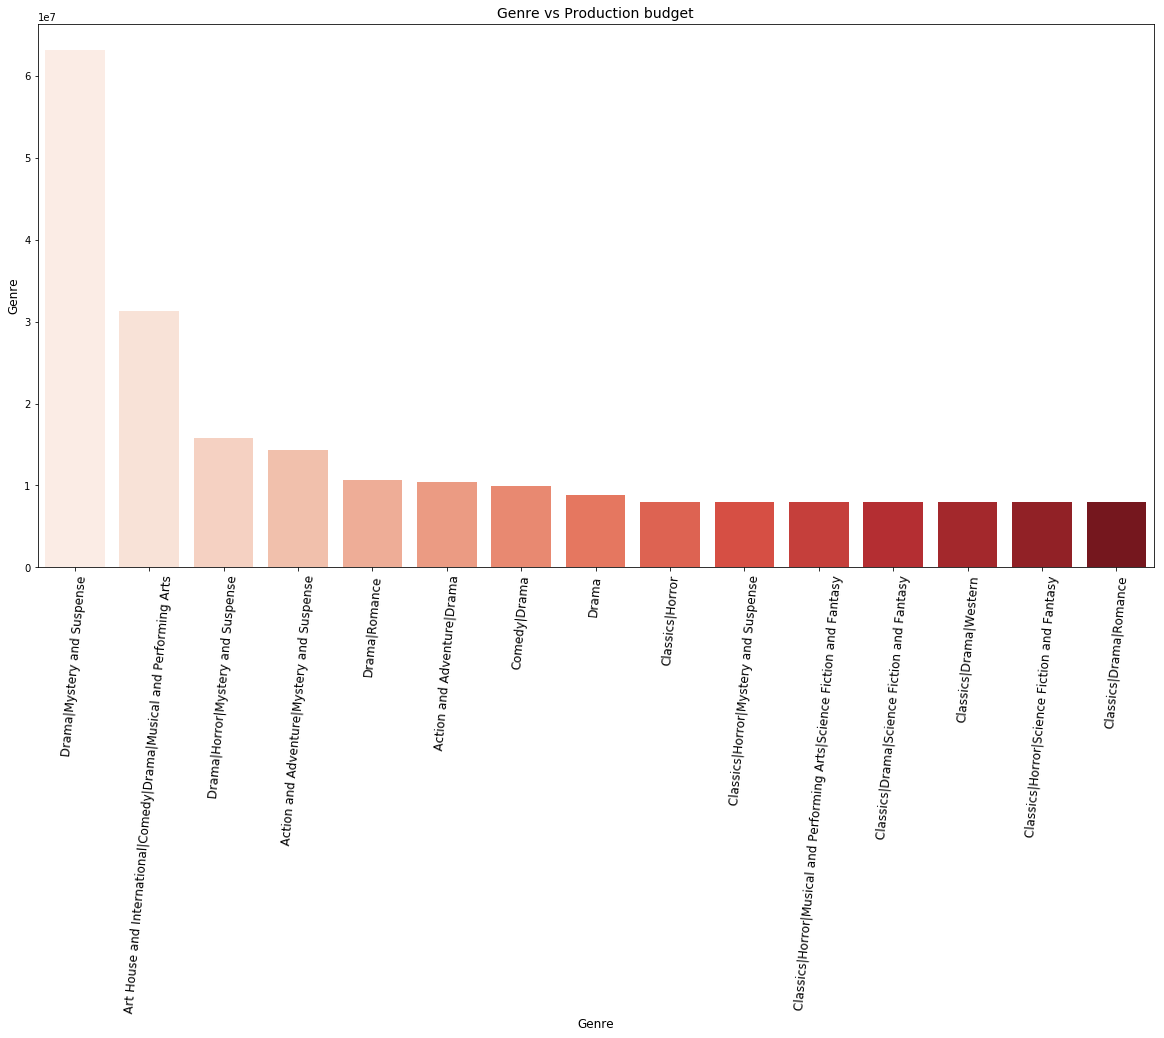

In [73]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x=top_15_profit_df['genre'], y=top_15_profit_df['production_budget'],palette='Reds')
plt.xticks(rotation=85,fontsize=12);
axislabels("Genre",'production budget','Genre vs Production budget')

In [74]:
"""RECOMMENDATION:As much as Drama,mystery and suspense ,Horror and comedy are most expensive,we have seen 
above that they have the most returns and I recommend the genres above."""

'RECOMMENDATION:As much as Drama,mystery and suspense ,Horror and comedy are most expensive,we have seen \nabove that they have the most returns and I recommend the genres above.'

## ANALYSIS 5:Checking if the runtime can affect the profit

In [75]:
#adding a runtime column in the profit data frame
profit_df['runtime']=movies_info_df['runtime']

In [76]:
profit_df.drop(columns='runtime',inplace=True)

In [77]:
movies_info_df['runtime'].head(2)

0    101.0
1    101.0
Name: runtime, dtype: float64

In [78]:
#groping by run time and only displaying the columns i need in analysis

In [79]:
runtime_df=movies_info_df.groupby('runtime',as_index=False)[['production_budget','worldwide_gross_y','profit']].mean().sort_values(by='profit',ascending=False)

In [80]:
#setting the data frame to have only 10 elements.
runtime_df=runtime_df.head(10)
runtime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 92 to 46
Data columns (total 4 columns):
runtime              10 non-null float64
production_budget    10 non-null float64
worldwide_gross_y    10 non-null float64
profit               10 non-null float64
dtypes: float64(4)
memory usage: 400.0 bytes


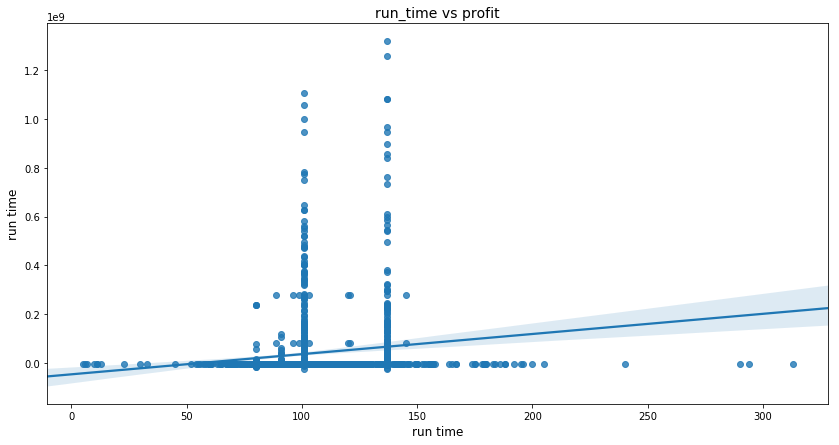

In [81]:
#do a reg plot to check the if the relationship is linear
plt.figure(figsize=(14,7))
ax=sns.regplot(y=movies_info_df['profit'], x=movies_info_df['runtime'])
axislabels("run time",'money made','run_time vs profit');

There is a small positive correlation between the run time and the profits,however it is not strong enough to affect the profit.The relationship is very weak

In [82]:
#plotting a line graph just to be sure

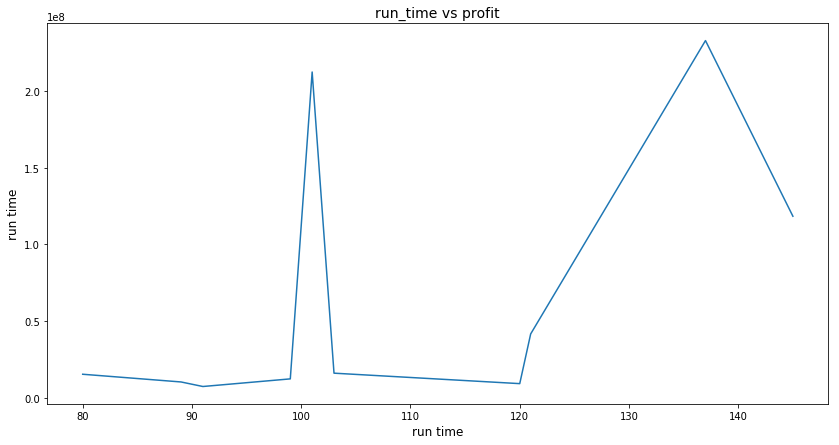

In [83]:
plt.figure(figsize=(14,7))
ax=sns.lineplot(y=runtime_df['profit'], x=runtime_df['runtime'])
axislabels("run time",'money made','run_time vs profit');

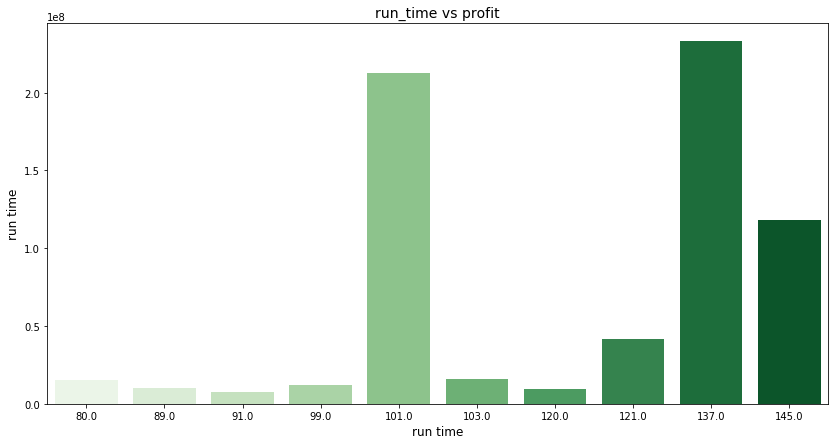

In [84]:
#another bar graph of runtime vs profit
plt.figure(figsize=(14,7))
ax=sns.barplot(y=runtime_df['profit'], x=runtime_df['runtime'],palette='Greens')
axislabels("run time",'money made','run_time vs profit');

### CONCLUSION
The relationship is not linear at all and that means the run time does not neccesarily affect the profit

Bonus plot for confirmation,there is no linear relationship between the run time and profit.

## ANALYSIS 6: Checking whether movie rating affect profit

In [85]:
#grouping by rating and only extracting the columns i need in this analysis
rating_df=movies_info_df.groupby('rating',as_index=False)[['production_budget','worldwide_gross_y']].mean()

In [86]:
rating_df

rating  production_budget  worldwide_gross_y
0      G       8.000000e+06       3.587191e+06
1     NR       8.292704e+06       5.092227e+06
2     PG       8.424242e+06       5.238009e+06
3  PG-13       4.210190e+07       1.331678e+08
4      R       2.553527e+07       5.729518e+07

In [87]:
#checking which rating has most profit.

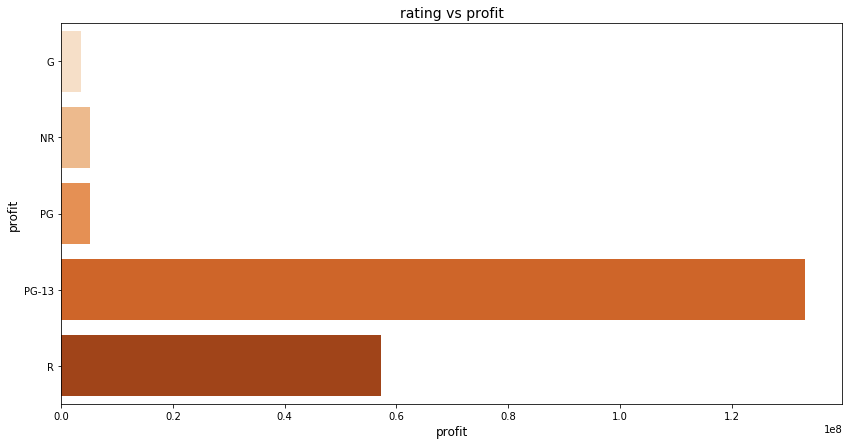

In [88]:
plt.figure(figsize=(14,7))
ax=sns.barplot(y=rating_df['rating'], x=rating_df['worldwide_gross_y'],palette='Oranges')
axislabels("profit",'rating','rating vs profit');

### CONCLUSION
From my analysis,R-Rated movies and PG-13 rated movies make the most profit as compared to G and NR movies. Microsoft should consider the rating of the movie depending on the target market because they make the most profit. I recommend PG-13 and R rated movies because they make the highest returns.

## checking whether rating affects budget

In [89]:
#plotting a bar graph to see which rating has the highest budget

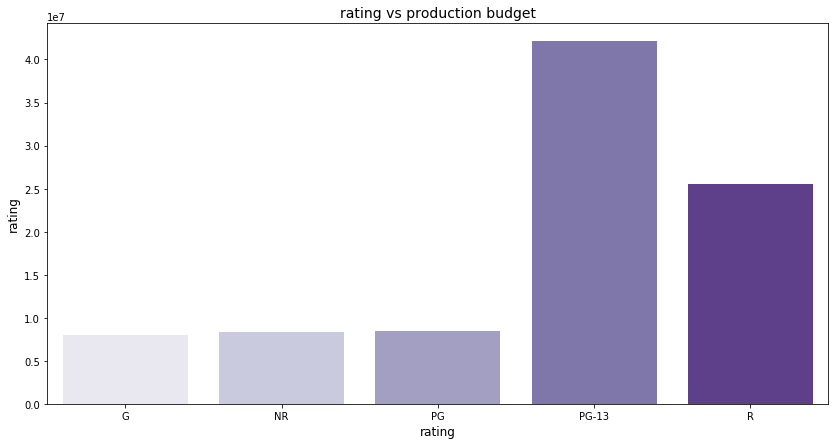

In [90]:
plt.figure(figsize=(14,7))
ax=sns.barplot(x=rating_df['rating'], y=rating_df['production_budget'],palette='Purples')
axislabels("rating",'production_project','rating vs production budget');

### CONCLUSION
PG-13 and R rated movies are the most expensive to produce according to the graph above.

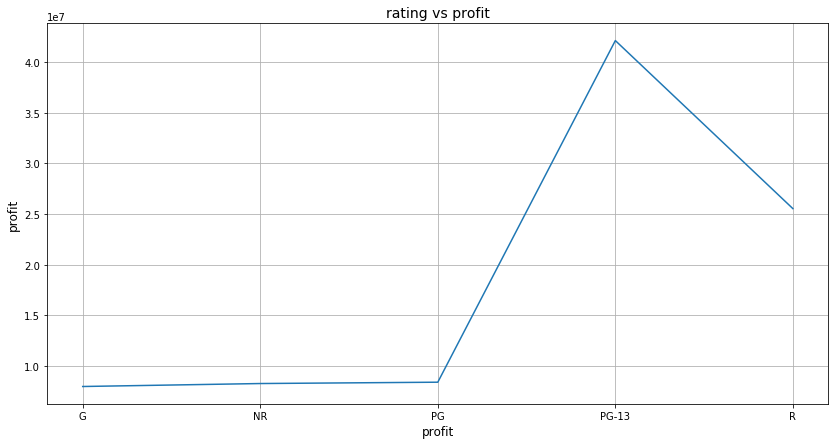

In [91]:
#another line graph to see which movie rating is expensive to create
plt.figure(figsize=(14,7))
ax=sns.lineplot(x=rating_df['rating'], y=rating_df['production_budget'],palette='Purples')
plt.grid()
axislabels("profit",'rating','rating vs profit');

## ANALYSIS 7:Checking if time of the year movie is produced affects profit

In [92]:
#changing the date format this column to type datetime
movies_info_df['release_date_y']=pd.to_datetime(movies_info_df['release_date_y'])

In [93]:
#checking if it has worked
movies_info_df['release_date_y'].head()

0   2015-11-06
1   2017-05-19
2   2010-11-12
3   2010-11-12
4   2012-07-13
Name: release_date_y, dtype: datetime64[ns]

In [94]:
#showing only the month in the dates
months=[dates.strftime('%B') for dates in movies_info_df['release_date_y']]

In [95]:
#creating a new column in the movies_info_df to show only the months I created in the cell above
movies_info_df['month']=months

In [96]:
#grouping by month and extraction only the worldwisde gross column to plot 
month_profit_df=movies_info_df.groupby('month',as_index=False)['worldwide_gross_y'].mean()
month_profit_df

month  worldwide_gross_y
0       April       9.921989e+07
1      August       1.367628e+08
2    December       2.436402e+08
3    February       1.684843e+08
4     January       1.442684e+08
5        July       3.225204e+08
6        June       2.219695e+08
7       March       1.642920e+08
8         May       2.122069e+08
9    November       2.311224e+08
10    October       7.088707e+06
11  September       1.180636e+08

In [97]:
#groping by month and only dispalyong the profit column
month_profit=movies_info_df.groupby('month',as_index=False)['profit'].median()
month_profit.head()

month       profit
0     April   27258419.5
1    August   69650253.0
2  December  202490682.0
3  February   76016627.5
4   January   81938091.0

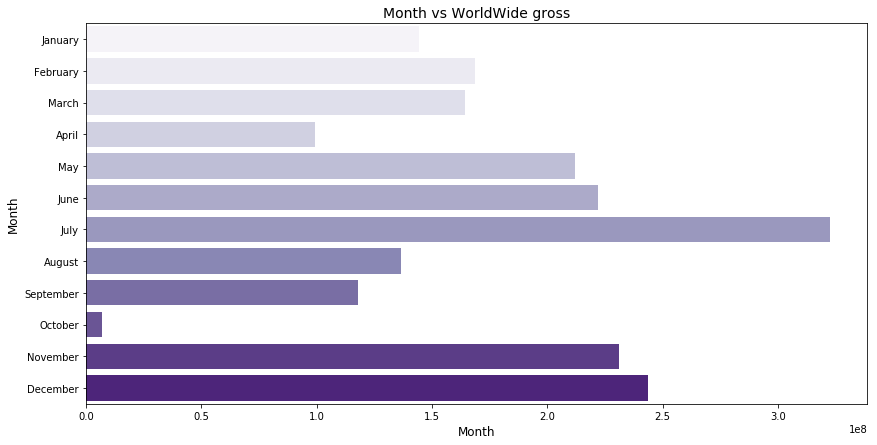

In [98]:
plt.figure(figsize=(14,7))
ax=sns.barplot(y=month_profit_df['month'], x=month_profit_df['worldwide_gross_y'],palette='Purples',
              order=['January','February','March','April','May','June','July','August','September',
                    'October','November','December'])
axislabels("Month",'worldwide_gross_y','Month vs WorldWide gross');

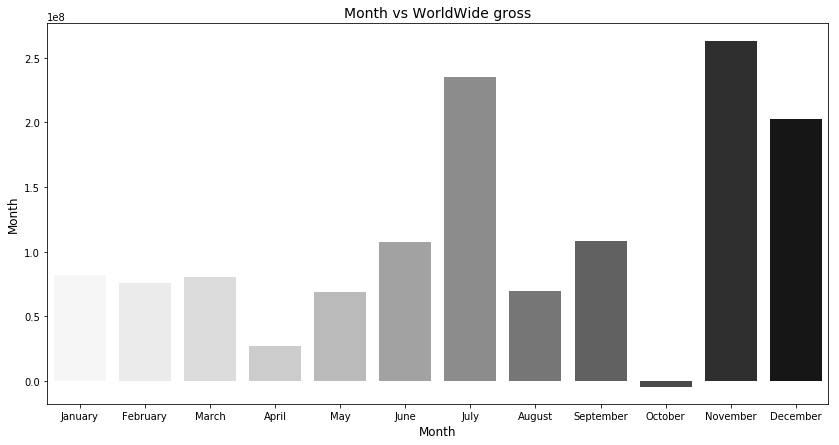

In [99]:
#checking the month that brings in the most profit
plt.figure(figsize=(14,7))
ax=sns.barplot(x=month_profit['month'], y=month_profit['profit'],palette='Greys',
              order=['January','February','March','April','May','June','July','August','September',
                    'October','November','December'])
axislabels("Month",'worldwide_gross_y','Month vs WorldWide gross');

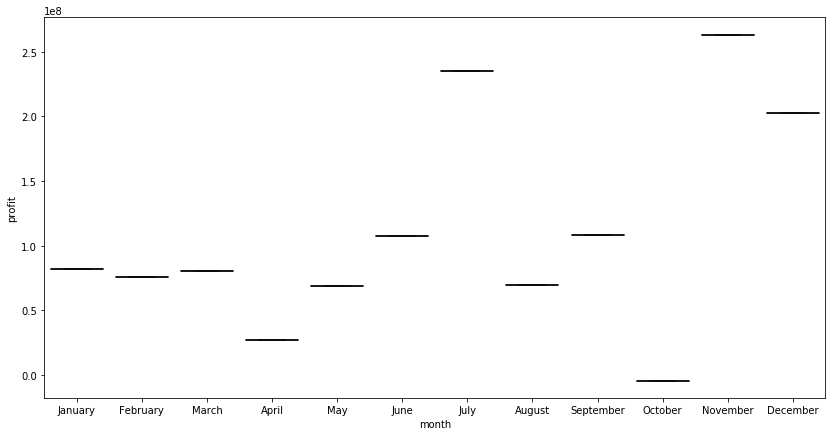

In [105]:
plt.figure(figsize=(14,7))
ax=sns.boxplot(x=month_profit['month'], y=month_profit['profit'],palette='Greys',
              order=['January','February','March','April','May','June','July','August','September',
                    'October','November','December'])

### CONCLUSION 
Producing movies in the Month of June,July,November,December has the most profit makes the most returns and so Microsoft should release many of their movies in those months.

## MULTIVARIATE ANALYSIS:analysis of more than one statistical outcome variable at a time

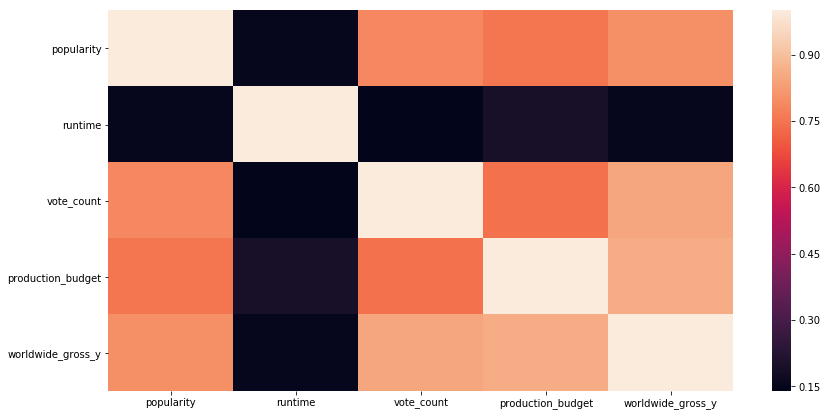

In [101]:
plt.figure(figsize=(14,7))
corr = movies_info_df[["popularity","runtime","vote_count","production_budget","worldwide_gross_y"]].corr()
sns.heatmap(corr);

### EXPLANATION 

In this heatmap, there is quite a strong positive relationship between the variables.
All the light colores, example, productio budget and world wide gross, and also the budget and the vote count,
popularity and world wide gross are quite strongly negative correlated.

In [102]:
movies_info_df.columns

Index(['original_title', 'popularity', 'title', 'vote_average', 'vote_count',
       'studio', 'year', 'release_date_y', 'production_budget',
       'domestic_gross_y', 'worldwide_gross_y', 'id', 'synopsis', 'rating',
       'genre', 'director', 'writer', 'runtime', 'profit', 'month'],
      dtype='object')

In [103]:
movies_info_df.to_csv('movies_info_df.csv', index=False)

# Recommendations
## First recommendation
I recommend Microsoft to look into producing drama related movies with comedy,Action,mystery and suspense because apart from being the most produced genres,they are also very profitable.

## Second recommendation
From my analysis,R-Rated movies and PG-13 rated movies make the most profit as compared to G and NR movies. Microsoft should consider the rating of the movie depending on the target market because they make the most profit. I recommend PG-13 and R rated movies because they make the highest returns.

## Third recommendation
Producing movies in the Month of June,July,November,December has the most profit or the highest returns and so Microsoft should release many of their movies in those months.

## Important to note
The most profitable genres are also the most according to my analysis expensive to produce.Microsoft to keep this in mind.